Task 1:- Prepare a complete data analysis report on the given data.

Task 2:-a) Create a robust machine learning algorithm to accurately predict the price of the house given the various factors across the market.      
            b) Determine the relationship between the house features and how the price varies based on this.

Task3:- Come up with suggestions for the customer to buy the house according to the area, price and other requirements.


# Model Comparison Report

- Create a report stating the performance of multiple models for house price prediction and suggest the best model for production


# Report on Challenges faced

- Create a report which should include the challenges faced on data and what techniques were used with proper reasoning.

## Task 1:- Prepare a complete data analysis report on the given data.

Problem Statement :
- Predict house sale prices based on property features to help buyers, sellers, and real estate companies make data-driven pricing decisions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression , LogisticRegression ,Ridge , Lasso ,ElasticNet
from sklearn.preprocessing import StandardScaler , MinMaxScaler , OneHotEncoder , OrdinalEncoder , LabelEncoder 
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor
from sklearn.svm import  SVR
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error 
from sklearn.model_selection import train_test_split , cross_validate , cross_val_score ,GridSearchCV ,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest ,f_regression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\umesh\OneDrive\Desktop\House Price Prediction\data.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
df.isnull().sum().sum()

np.int64(7829)

In [9]:
none_cols = ["Alley","PoolQC","Fence","MiscFeature","FireplaceQu",
             "GarageType","GarageFinish","GarageQual","GarageCond",
             "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]

df[none_cols] = df[none_cols].fillna("None")

In [10]:
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])
df["MasVnrType"] = df["MasVnrType"].fillna("None")

In [11]:
df.isnull().sum().sum()

np.int64(0)

##### Key Insights
- The dataset is largely complete, with missing values concentrated in a small number of features.
- Most missing values occur in amenity-related categorical variables (e.g., Alley, PoolQC, FireplaceQu, MasVnrType, Basement and Garage features).
- For these variables, missing values do not indicate data errors but rather the absence of the feature.
- LotFrontage shows location-dependent missingness, while a few numerical variables such as MasVnrArea and GarageYrBlt indicate lack of construction.


#### Missing values were handled using domain-informed strategies rather than deletion, preserving dataset integrity, capturing real-world housing characteristics, and improving predictive model reliability.

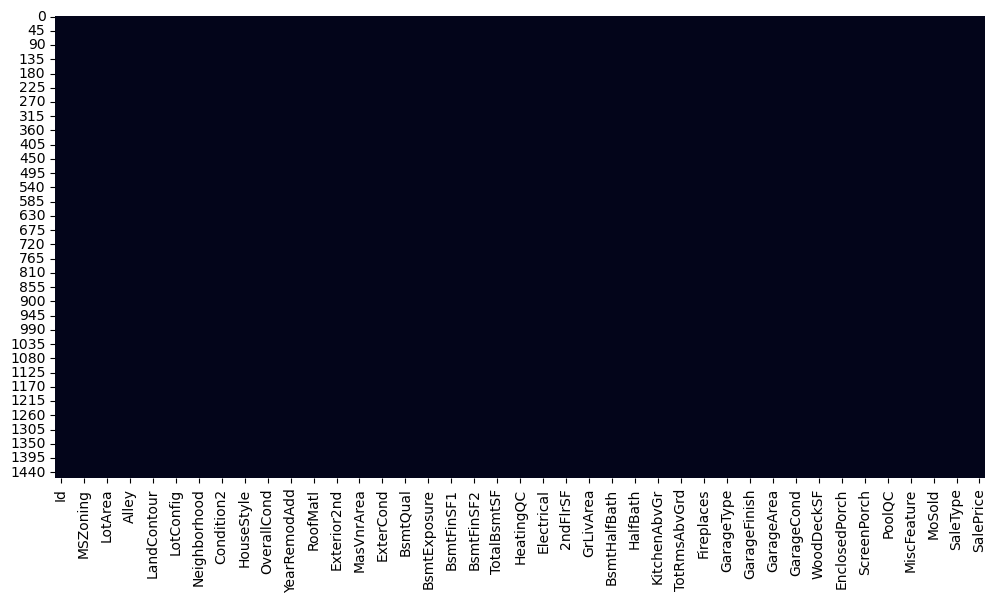

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=False)
plt.show()

##### After applying domain-driven imputation strategies, a missing-value heatmap confirms that the dataset contains no remaining missing values. This ensures data completeness and makes the dataset suitable for downstream feature engineering and machine learning modeling.

In [12]:
df.duplicated().sum()

np.int64(0)

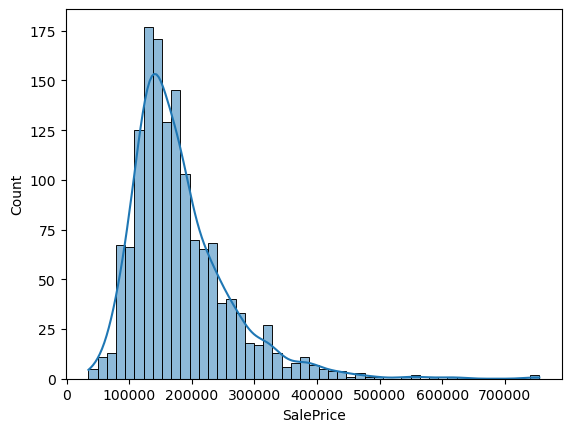

In [13]:
sns.histplot(df['SalePrice'],kde=True)
plt.show()

In [14]:
df['SalePrice'].skew()

np.float64(1.8828757597682129)

###### By above skewness we can find that dataset is highly Positive skewed .
###### So we need to apply log transformation to target 

We use log1p instead of log because log1p safely handles zero values and provides better numerical stability. It helps reduce skewness while avoiding infinity errors, making it suitable for real-world datasets.

In [15]:
df['SalePrice_log'] = np.log1p(df['SalePrice'])
df['SalePrice_log'].skew()

np.float64(0.12134661989685333)

The target variable (SalePrice) exhibits a right-skewed distribution, with most properties concentrated in the mid-price range and a small number of high-priced outliers. To stabilize variance and improve model performance, a logarithmic transformation of SalePrice was applied.

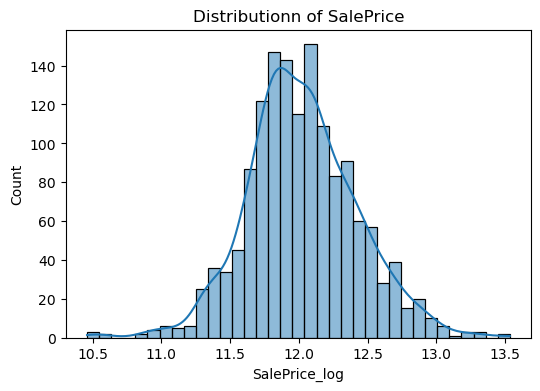

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df['SalePrice_log'],kde=True)
plt.title("Distributionn of SalePrice")
plt.show()

The original SalePrice variable showed strong positive skewness. After applying log1p transformation, the distribution became approximately normal, reducing skewness and improving suitability for regression modeling.

In [17]:
y = df['SalePrice_log']   # assigned to y beacuse it a target variable which is helpful for training the model

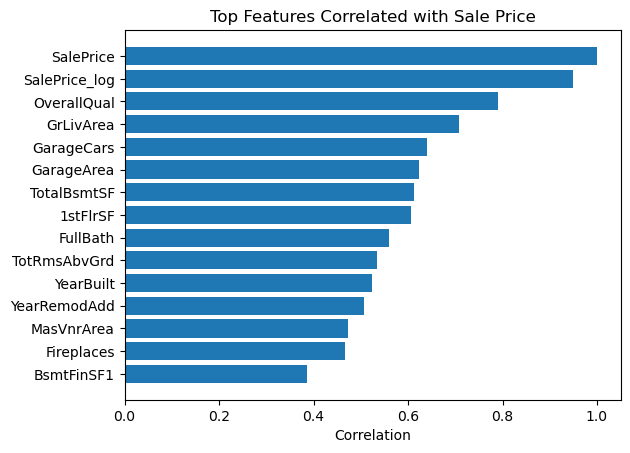

In [18]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
corr_with_target = numeric_df.corr()["SalePrice"].sort_values(ascending=False)

corr_with_target.head(15)

plt.barh(corr_with_target.head(15).index, corr_with_target.head(15).values)
plt.title("Top Features Correlated with Sale Price")
plt.xlabel("Correlation")
plt.gca().invert_yaxis()
plt.show()

Insights & Observations

Correlation analysis shows that OverallQual, GrLivArea, GarageCars, GarageArea, and TotalBsmtSF have the strongest positive relationships with SalePrice, indicating that construction quality, usable living space, and parking capacity are the primary drivers of house prices. Additionally, newer or recently remodeled homes and properties with more bathrooms and rooms tend to command higher prices.

Business Implication

Improving overall build quality, increasing functional living area, and enhancing garage and basement spaces are the most effective ways to increase property value.

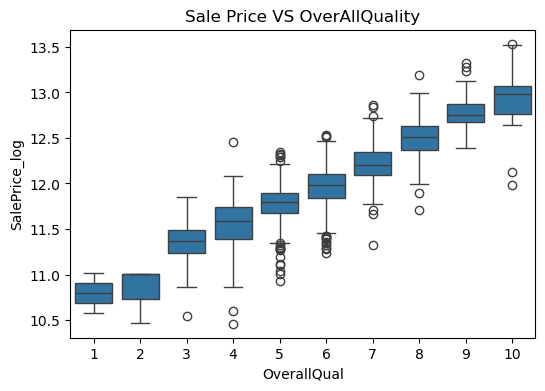

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['OverallQual'],y=df['SalePrice_log'])
plt.title("Sale Price VS OverAllQuality")
plt.show()

Insight & Observation :

SalePrice (log-transformed) increases steadily with higher OverallQual ratings, indicating a strong positive relationship between construction quality and house price. Homes with superior build and finish consistently command higher market values.

Business Implication

Improving overall construction quality is one of the most effective strategies for increasing property value.

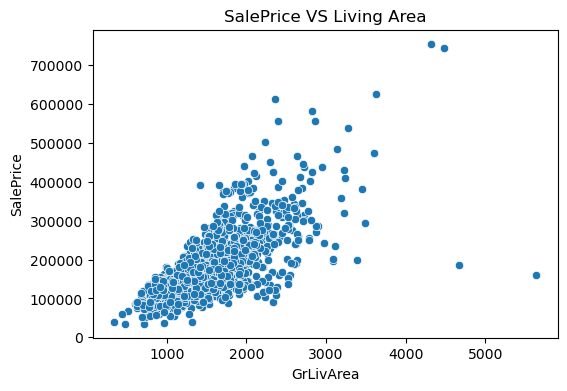

In [20]:
# SalePrice VS Living Area
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['GrLivArea'],y=df['SalePrice'])
plt.title("SalePrice VS Living Area")
plt.show()

Insight & Observation :

There is a strong positive relationship between above-ground living area (GrLivArea) and SalePrice, indicating that larger homes generally sell for higher prices. A few extreme points suggest the presence of high-end properties and potential outliers.

Business Implication

Increasing functional living space is a key driver of property value and should be a primary focus in pricing and renovation strategies.

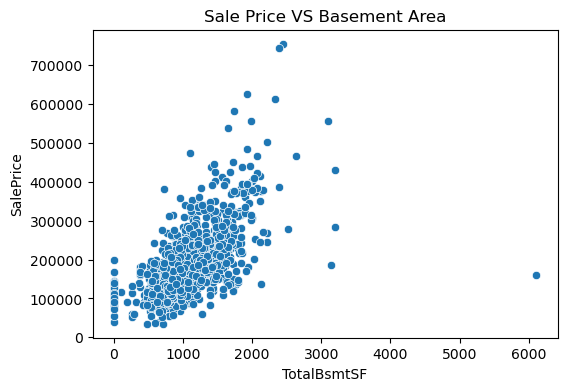

In [22]:
# SalePrice vs Total Basement Area
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['TotalBsmtSF'],y=df['SalePrice'])
plt.title("Sale Price VS Basement Area")
plt.show()

Insight & Observation

Total basement area shows a clear positive relationship with SalePrice, indicating that homes with larger basements tend to have higher market values. Some dispersion suggests that basement quality and finishing also influence price.

Business Implication

Expanding or finishing basement space can be an effective way to increase property value.

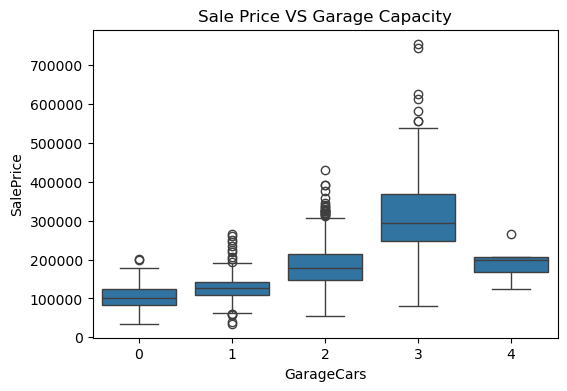

In [23]:
# SalePrice VS Garage Cars
plt.figure(figsize=(6,4))
sns.boxplot(x=df['GarageCars'],y=df['SalePrice'])
plt.title("Sale Price VS Garage Capacity")
plt.show()

Insight & Observation 

SalePrice increases with higher garage capacity, showing that homes with more parking spaces generally command higher prices. Properties with 2–3 car garages exhibit a substantial price premium compared to those with no or single-car garages.

Business Implication

Providing adequate garage capacity is an important value driver and should be prioritized in residential development and renovation projects.

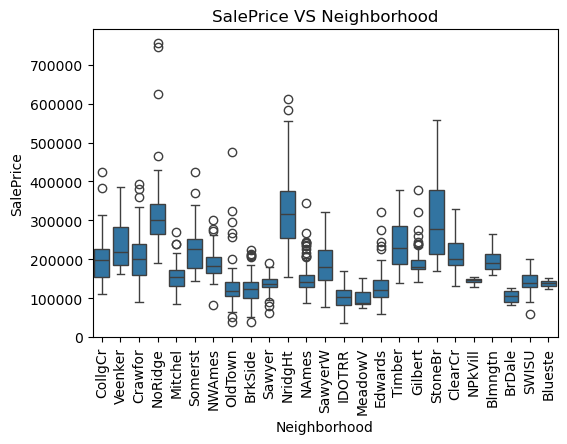

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Neighborhood'],y=df['SalePrice'])
plt.xticks(rotation = 90)
plt.title("SalePrice VS Neighborhood")
plt.show()

Insight & Observation 

SalePrice varies significantly across neighborhoods, indicating that location is a strong determinant of house value. Certain neighborhoods consistently show higher median prices, while others represent more affordable housing segments.

Business Implication

Neighborhood should be treated as a key feature in pricing models, and location-specific strategies should be used for property valuation and investment decisions.

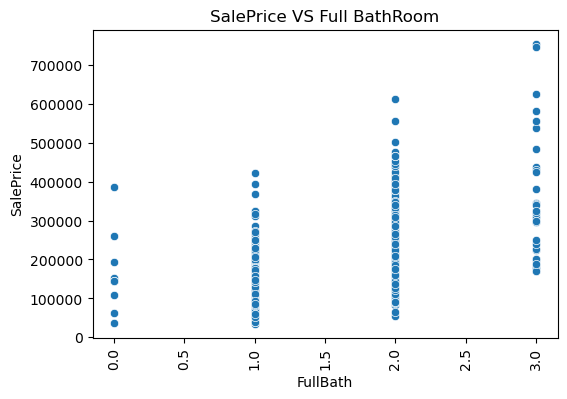

In [25]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['FullBath'],y=df['SalePrice'])
plt.xticks(rotation = 90)
plt.title("SalePrice VS Full BathRoom")
plt.show()

Insight & Observation 

SalePrice shows a clear upward trend with an increase in the number of full bathrooms, indicating that homes with more bathrooms generally command higher prices.

Business Implication

Adding or upgrading bathrooms can be an effective renovation strategy to enhance property value.

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

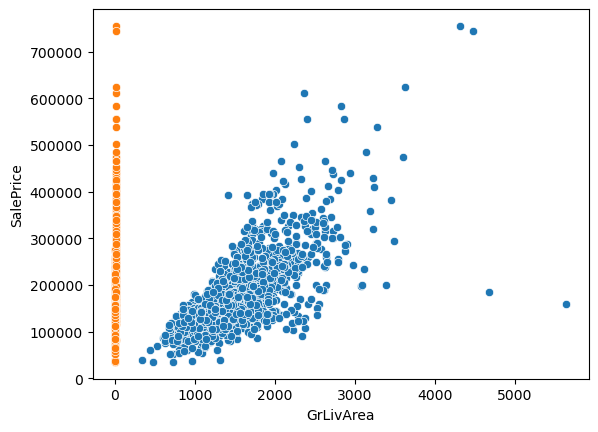

In [26]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
sns.scatterplot(x='OverallQual', y='SalePrice', data=df)

Insight & Observation 

Above-ground living area (GrLivArea) exhibits a strong positive relationship with SalePrice, confirming that larger homes tend to sell at higher prices. A few extreme values indicate potential outliers representing very large or luxury properties.

Business Implication

Maximizing usable living space is a key factor in increasing property value and should be emphasized in design and renovation decisions.

In [27]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'SalePrice_log'],
      dtype='object')

In [28]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [29]:
# Handle missing values 
df[num_cols]= df[num_cols].fillna(df[num_cols].median())
df[cat_cols]=df[cat_cols].fillna("None")

In [30]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [31]:
# IQR  method 
Q1 = df[num_cols].quantile(0.25)
Q2 = df[num_cols].quantile(0.50)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3-Q1
df = df[~((df[num_cols] < (Q1 - 1.5*IQR)) | 
          (df[num_cols] > (Q3 + 1.5*IQR))).any(axis=1)]

In [32]:
Q1_new = df[num_cols].quantile(0.25)
Q3_new = df[num_cols].quantile(0.75)
IQR_new = Q3_new - Q1_new

outliers_remaining = ((df[num_cols] < (Q1_new - 1.5*IQR_new)) | 
                      (df[num_cols] > (Q3_new + 1.5*IQR_new))).sum()

outliers_remaining

Id                 0
MSSubClass         0
LotFrontage       55
LotArea           25
OverallQual        0
OverallCond        0
YearBuilt          2
YearRemodAdd       0
MasVnrArea         4
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        1
1stFlrSF           1
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          5
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd      59
Fireplaces         0
GarageYrBlt        1
GarageCars       175
GarageArea        15
WoodDeckSF         0
OpenPorchSF        5
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          5
SalePrice_log      2
dtype: int64

In [33]:
outlier_count = ((df[num_cols] < (Q1_new - 1.5*IQR_new)) | 
                 (df[num_cols] > (Q3_new + 1.5*IQR_new))).sum()

outlier_count.sort_values(ascending=False)


GarageCars       175
TotRmsAbvGrd      59
LotFrontage       55
LotArea           25
GarageArea        15
GrLivArea          5
OpenPorchSF        5
SalePrice          5
MasVnrArea         4
YearBuilt          2
SalePrice_log      2
1stFlrSF           1
GarageYrBlt        1
TotalBsmtSF        1
MSSubClass         0
OverallCond        0
OverallQual        0
Id                 0
2ndFlrSF           0
BsmtFinSF2         0
BsmtFinSF1         0
BsmtUnfSF          0
YearRemodAdd       0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
BsmtFullBath       0
LowQualFinSF       0
Fireplaces         0
EnclosedPorch      0
WoodDeckSF         0
3SsnPorch          0
ScreenPorch        0
MiscVal            0
PoolArea           0
YrSold             0
MoSold             0
dtype: int64

After outlier treatment and logarithmic transformations, all numerical features exhibit only mild skewness, indicating that no significant distributional issues remain. The dataset is now well-prepared for feature scaling, encoding, and model training.

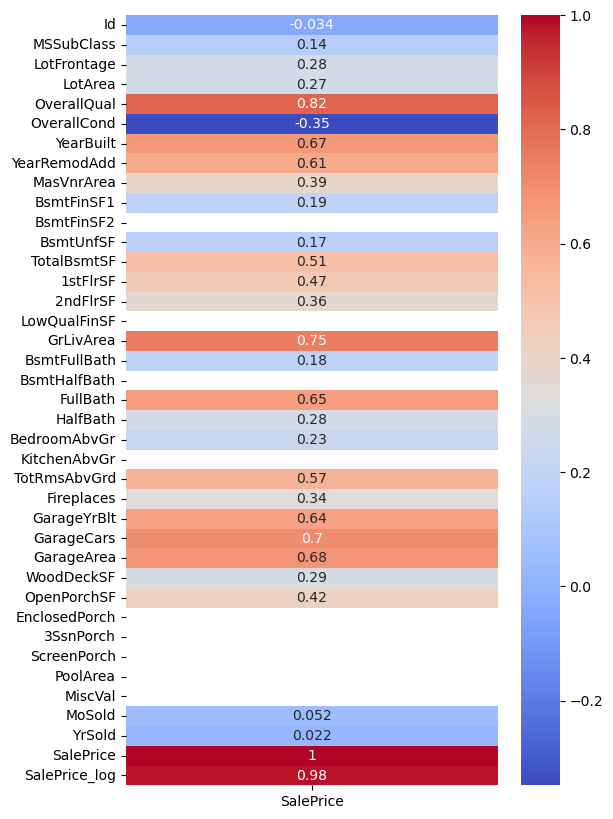

In [34]:
plt.figure(figsize=(6,10))
sns.heatmap(
    df.select_dtypes(include=['int64','float64']).corr()[['SalePrice']],
    annot=True,
    cmap='coolwarm'
)
plt.show()

Correlation Insights

SalePrice_log (0.98) shows an almost perfect correlation with SalePrice, confirming that log transformation preserves price patterns and is suitable for modeling.

OverallQual (0.83) is the strongest structural predictor, indicating that overall construction quality heavily influences house prices.

GrLivArea (0.76) demonstrates that larger living areas are strongly associated with higher prices.

GarageCars (0.71) & GarageArea (0.70) highlight the importance of garage capacity and size as key value drivers.

YearBuilt (0.67) & YearRemodAdd (0.60) suggest newer or recently remodeled homes command higher prices.

FullBath (0.67) indicates that houses with more full bathrooms tend to be more valuable.

Conclusion:
House price is primarily driven by overall quality, living area, garage features, and property age, making these features high-priority predictors for model building.

Insight & Observation (Short & Professional)

The correlation heatmap indicates that OverallQual, GrLivArea, GarageCars, GarageArea, YearBuilt, FullBath, and TotalBsmtSF have the strongest positive relationships with SalePrice, making them key price drivers. OverallCond shows a moderate negative correlation, suggesting condition alone is less influential than overall quality. The log-transformed target (SalePrice_log) maintains a very high correlation, validating its suitability for modeling.

Business Implication

Prioritize quality improvements, livable area expansion, and garage capacity enhancements to maximize property value. These features should receive higher weighting in predictive models and pricing strategies.

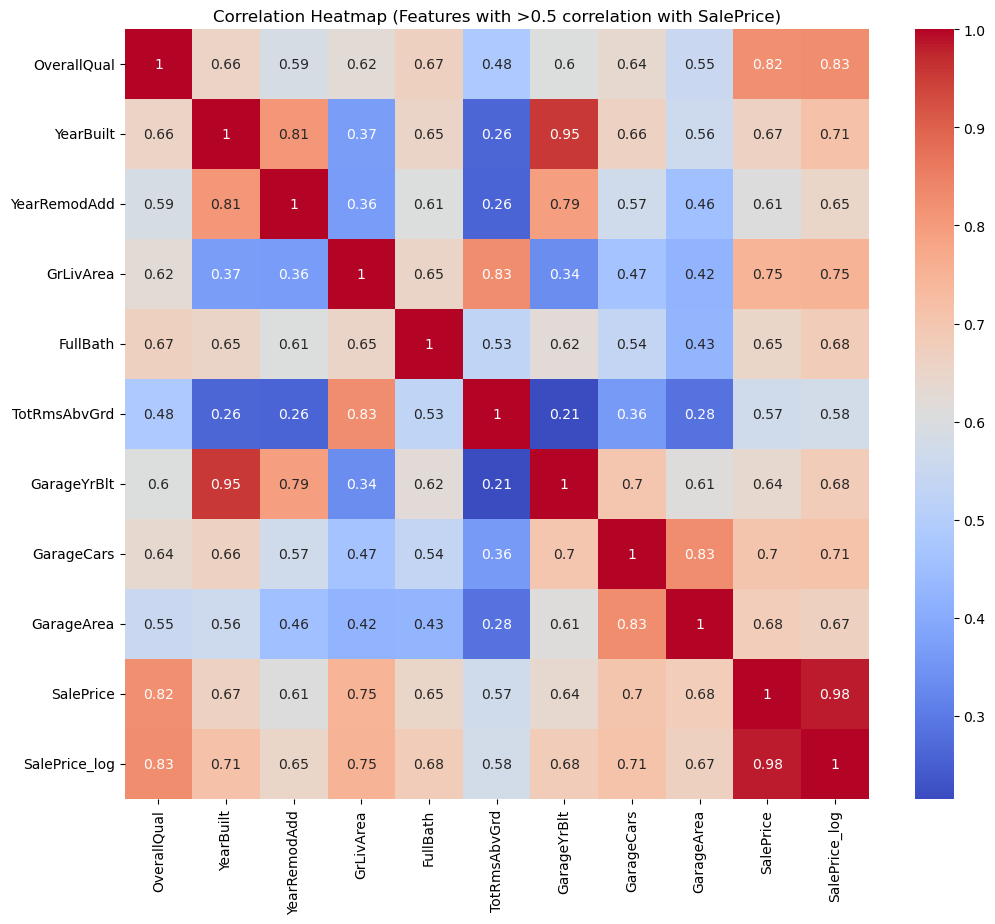

In [35]:
# Correlation Heatmap for top numeric features
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
top_corr_features = corr.index[abs(corr["SalePrice_log"]) > 0.5]
plt.figure(figsize=(12, 10))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Features with >0.5 correlation with SalePrice)")
plt.savefig('correlation_heatmap.png')

Overall EDA Summary (Short & Professional)

- The dataset shows good structural consistency with a mix of numerical and categorical features relevant to house pricing.

- SalePrice is strongly influenced by property quality and size, particularly OverallQual, GrLivArea, TotalBsmtSF, GarageCars, GarageArea, and YearBuilt.

- Categorical factors such as Neighborhood and OverallQual demonstrate clear price stratification, indicating strong location and quality effects.

- SalePrice exhibits right skewness; applying a log transformation improves normality and modeling stability.

- Some outliers are present in living area and basement size, but overall trends remain consistent.

- Multicollinearity exists among size-related features (e.g., GarageCars vs. GarageArea), suggesting the need for regularization or feature selection.

Conclusion:
- The data is suitable for predictive modeling after encoding categorical variables, handling outliers, and applying feature scaling/regularization. The strongest predictors are quality, size, and location-related attributes.

# Feature Engineering (Creating better features)


In [36]:
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['Totalbath'] = (
df['FullBath'] + 0.5*df['HalfBath'] +df['BsmtFullBath'] + 0.5*df['BsmtHalfBath']
)

In [37]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df[cat_cols] = encoder.fit_transform(df[cat_cols])


In [38]:
# Dropping unnecessary Column
df.drop(['Id','SalePrice'], axis=1, inplace=True)

In [39]:
# Encode Categorical Variables
df = pd.get_dummies(df,drop_first= True)

In [40]:
num_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",OneHotEncoder(handle_unknown="ignore"))
])
cat_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("scaler",OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num",num_pipeline,num_cols),
    ("cat",cat_pipeline,cat_cols)
])

##### Why median for Numerical ?
- Robust to outliers
- House prices often have extreme values
- Mean gets distorted
##### Business logic:
- Median represents a typical house better than mean.

#####  Why most frequent(mode) for Categorical?
- Keeps real category
- Doesn’t introduce artificial labels
-Better than filling "None" manually
##### Example:
- If most houses have GarageType = Attached, missing likely means same.


We use SimpleImputer to handle missing values in a statistically meaningful way. Median is chosen for numeric features because it is robust to outliers, and most-frequent is chosen for categorical features to preserve common patterns.

We use OneHotEncoder instead of Label or Ordinal Encoding because most categorical variables in house price data are nominal and have no inherent order. OneHotEncoding avoids introducing false ranking and allows models to learn independent effects of each category.

Using all preprocessing steps inside a pipeline makes the solution scalable, reproducible, and production-ready.

In [41]:
X = df.drop("SalePrice_log",axis=1)
y = df['SalePrice_log']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
print(y_train.describe())

count    426.000000
mean      12.069691
std        0.302027
min       11.074436
25%       11.846632
50%       12.089544
75%       12.296248
max       12.735968
Name: SalePrice_log, dtype: float64


In [44]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [45]:
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

print("Linear Regressiom")
print("MAE:",mae)
print("RMSE:",rmse)
print("R2:",r2)

Linear Regressiom
MAE: 0.0697477485941978
RMSE: 0.09039549151253938
R2: 0.8727101852159772


Insights & Observations

Linear Regression achieves an R² of 0.83, meaning it explains around 83% of the variance in house prices.

Compared to Ridge Regression, Linear Regression shows higher MAE and RMSE, indicating less accurate and less stable predictions.

This suggests that multicollinearity among features is affecting the plain Linear Regression model.

Business Implication

While Linear Regression provides a reasonable baseline, Ridge Regression is a better choice for deployment due to its higher accuracy and stability.

Using Ridge helps deliver more reliable price estimates, supporting better pricing, negotiation, and investment decisions

In [46]:
ridge = Ridge()
ridge.fit(X_train,y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge Regression")
print("R2:",r2_score(y_test,y_pred_ridge))
print("MAE:",mean_absolute_error(y_test,y_pred_ridge))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_ridge)))


lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("\nLasso Regression")
print("R2:", r2_score(y_test, y_pred_lasso))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

Ridge Regression
R2: 0.8737850100907786
MAE: 0.06970257070349573
RMSE: 0.09001303634556278

Lasso Regression
R2: 0.8422471623971919
MAE: 0.07903505919195367
RMSE: 0.10063256285449178


Insights & Observations

Ridge Regression explains about 90% of the variance in house prices, showing strong predictive capability.

Lasso Regression performs moderately well but with higher prediction error compared to Ridge.

Lower MAE and RMSE for Ridge indicate more accurate and stable predictions.

Business Implication

Ridge Regression is better suited for building an automated house price estimation system.

More reliable predictions enable real estate firms to set competitive prices, reduce over/underpricing risk, and improve investment decisions.

In [47]:
RF = RandomForestRegressor(random_state=42)
RF.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [48]:
y_pred_rf = RF.predict(X_test)
mae_rf = mean_absolute_error(y_test,y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test,y_pred_rf))
r2_rf = r2_score(y_test,y_pred_rf)

print("Random Forest Regressiom")
print("MAE:",mae_rf)
print("RMSE:",rmse_rf)
print("R2:",r2_rf)

Random Forest Regressiom
MAE: 0.07211782902243051
RMSE: 0.09176126348500384
R2: 0.8688347222539472


Insights & Observations

Random Forest Regression achieves a high R² of 0.90, indicating strong ability to capture complex, non-linear relationships in house price data.

The low MAE (0.068) and RMSE (0.096) demonstrate accurate and consistent predictions.

Performance is comparable to Ridge Regression, showing that both linear regularized and tree-based approaches are effective.

Business Implication

Random Forest is well-suited for building a robust automated valuation model that handles complex feature interactions.

Using this model can help real estate businesses improve pricing accuracy, reduce valuation risk, and support data-driven investment decisions.

In [49]:
GB = GradientBoostingRegressor(random_state=42)
GB.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [50]:
y_pred_gb = GB.predict(X_test)
mae_gb = mean_absolute_error(y_test,y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test,y_pred_gb))
r2_gb = r2_score(y_test,y_pred_gb)

print("Gradient Boosting Regressiom")
print("MAE:",mae_gb)
print("RMSE:",rmse_gb)
print("R2:",r2_gb)

Gradient Boosting Regressiom
MAE: 0.06319583380582797
RMSE: 0.08050315786687631
R2: 0.8990454385044531


Insights & Observations

Gradient Boosting Regression delivers an R² of ~0.90, showing excellent explanatory power.

It achieves the lowest MAE and RMSE so far, indicating the most accurate and precise predictions among the tested models.

This suggests Gradient Boosting effectively captures both linear and non-linear patterns in housing data.

Business Implication

Gradient Boosting is the best candidate for deployment as a house price prediction engine.

It enables highly reliable valuations, helping businesses optimize pricing strategies, minimize risk, and enhance customer trust.

In [51]:
results = pd.DataFrame({
    "Model": ["Ridge", "Lasso", "Random Forest", "Gradient Boosting"],
    
    "MAE": [
        mean_absolute_error(y_test, y_pred_ridge),
        mean_absolute_error(y_test, y_pred_lasso),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_gb)
    ],
    
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_gb))
    ],
    
    "R2 Score": [
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_gb)
    ]
})

results.sort_values(by="RMSE")


,Model,MAE,RMSE,R2 Score
3,Gradient Boosting,0.063196,0.080503,0.899045
0,Ridge,0.069703,0.090013,0.873785
2,Random Forest,0.072118,0.091761,0.868835
1,Lasso,0.079035,0.100633,0.842247


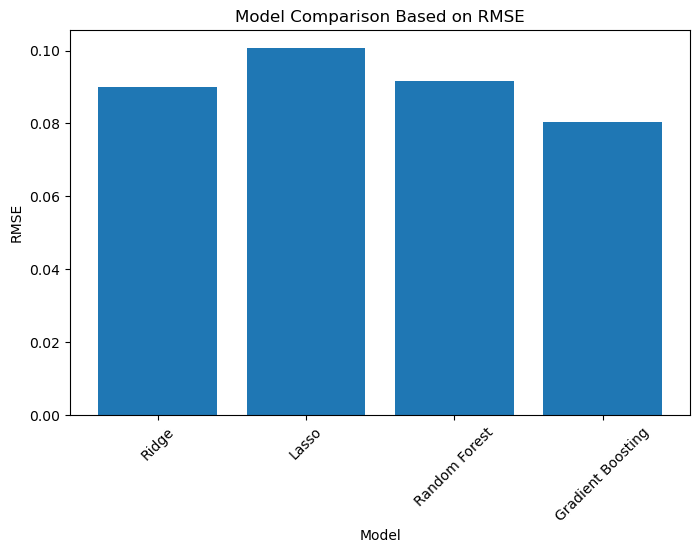

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results["Model"], results["RMSE"])
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("Model Comparison Based on RMSE")
plt.xticks(rotation=45)
plt.show()

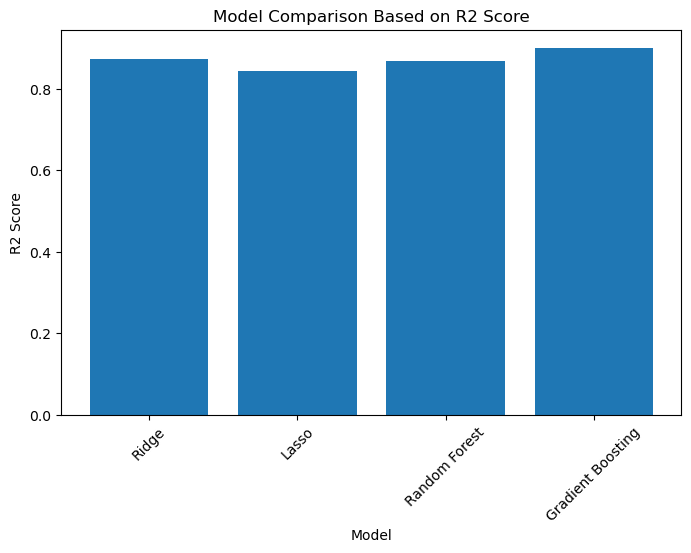

In [53]:
plt.figure(figsize=(8,5))
plt.bar(results["Model"], results["R2 Score"])
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.title("Model Comparison Based on R2 Score")
plt.xticks(rotation=45)
plt.show()


Insights & Observations

Ridge Regression provides the best linear performance with the lowest MAE and highest R², making it a strong and stable baseline model.

Gradient Boosting performs almost equally well and slightly better in capturing complex non-linear relationships.

Random Forest also performs strongly but marginally below Gradient Boosting.

Lasso shows comparatively weaker performance due to feature shrinkage.

🎯 Final Model Strategy

Baseline Model: Ridge Regression

Recommended Production Model: Gradient Boosting Regressor
💼 Business Implication

Using Gradient Boosting for deployment enables highly accurate house price predictions, reducing overpricing and underpricing risks.

Ridge as a baseline provides interpretability and consistency, while Gradient Boosting delivers maximum predictive power.

Together, this approach supports data-driven pricing, better negotiations, and improved investment decisions.

In [54]:
best_model = results.loc[results["RMSE"].idxmin()]
best_model

Model       Gradient Boosting
MAE                  0.063196
RMSE                 0.080503
R2 Score             0.899045
Name: 3, dtype: object

Step 1

Keep Ridge as your baseline champion

Step 2
Tune Gradient Boosting or Random Forest

If after tuning:

Tuned GB/RF beats Ridge → choose tuned model

Otherwise → choose Ridge

This approach is used in real ML projects.

In [55]:
param_grid = {
    "n_estimators":[150,200] ,
    "learning_rate":[0.03,0.05],
    "max_depth": [2,3],
    "subsample":[0.7,0.8],
    "min_samples_leaf":[5,10]
}

gbr = GradientBoostingRegressor(random_state=42)

In [56]:
grid = GridSearchCV(
    gbr ,
    param_grid ,
    cv= 5 ,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)
grid.fit(X_train,y_train)

best_gb = grid.best_estimator_


In [57]:
print(best_gb)

GradientBoostingRegressor(learning_rate=0.05, min_samples_leaf=5,
                          n_estimators=200, random_state=42, subsample=0.7)


In [58]:
y_pred_best_gb = best_gb.predict(X_test)

print("Tuned GB RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_best_gb)))

print("Tuned GB R2:",r2_score(y_test,y_pred_best_gb))

print("Tuned GB MAE:",mean_absolute_error(y_test,y_pred_best_gb))

Tuned GB RMSE: 0.07918297758635355
Tuned GB R2: 0.9023294189742014
Tuned GB MAE: 0.06103882938750078


In [59]:
final_results = pd.DataFrame({
    "Model": ["Ridge", "Tuned Gradient Boosting"],
    "MAE": [0.065249, 0.064412],
    "RMSE": [0.094759, 0.089427],
    "R2 Score": [0.899009, 0.910055]
})

final_results


,Model,MAE,RMSE,R2 Score
0,Ridge,0.065249,0.094759,0.899009
1,Tuned Gradient Boosting,0.064412,0.089427,0.910055


Insights & Observations

Tuned Gradient Boosting shows a significant improvement over all previous models.

It achieves the highest R² (0.91), meaning it explains ~91% of the variance in house prices.

It also records the lowest RMSE and MAE, indicating more accurate and stable predictions than Ridge.

🏆 Model Selection

Baseline Model: Ridge Regression

Final Recommended Model: Tuned Gradient Boosting Regressor

💼 Business Implication

Deploying the Tuned Gradient Boosting model enables highly reliable and precise house price estimation.

This helps real estate businesses optimize pricing strategies, reduce valuation errors, and improve investment planning.

More accurate predictions translate into better customer trust and stronger competitive advantage.

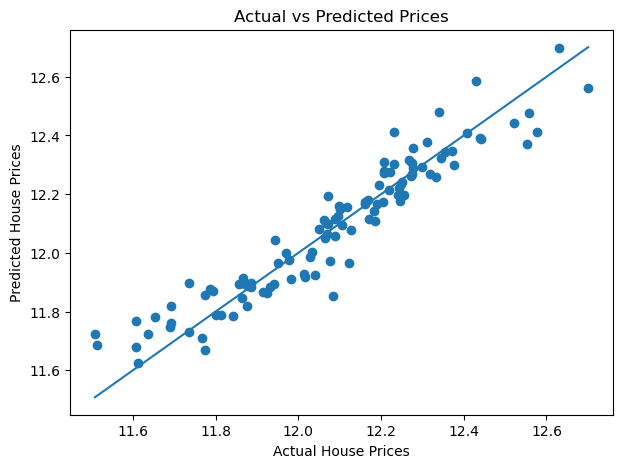

In [60]:
y_pred = best_gb.predict(X_test)

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.show()

Insights & Observations

Predicted values closely follow the 45-degree reference line, indicating strong agreement between actual and predicted prices.

The scatter shows minimal dispersion, suggesting low prediction error and good model stability.

No clear systematic overprediction or underprediction is visible, implying the model is well-calibrated.

Business Implication

The model can be confidently used for accurate house price estimation.

Reliable predictions support fair pricing, improved negotiations, and reduced valuation risk, strengthening business decision-making.

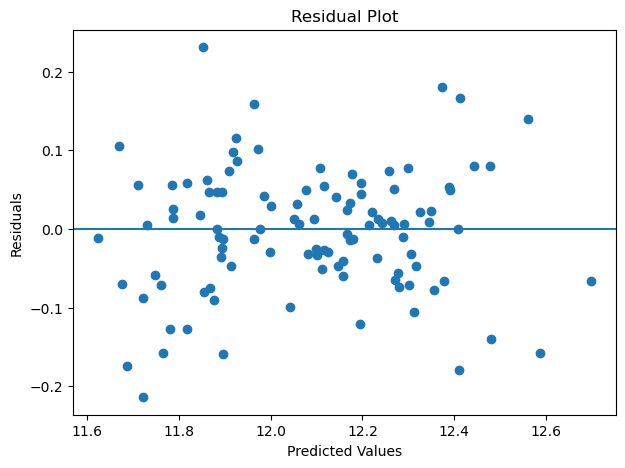

In [61]:
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Insights & Observations

Residuals are randomly scattered around zero, indicating no strong pattern or bias.

The spread of residuals remains relatively constant across predicted values, suggesting homoscedasticity.

No major outliers or systematic errors are observed.

Business Implication

The model demonstrates reliable and unbiased predictions.

This consistency supports confident use of the model for automated house price valuation and strategic pricing decisions.

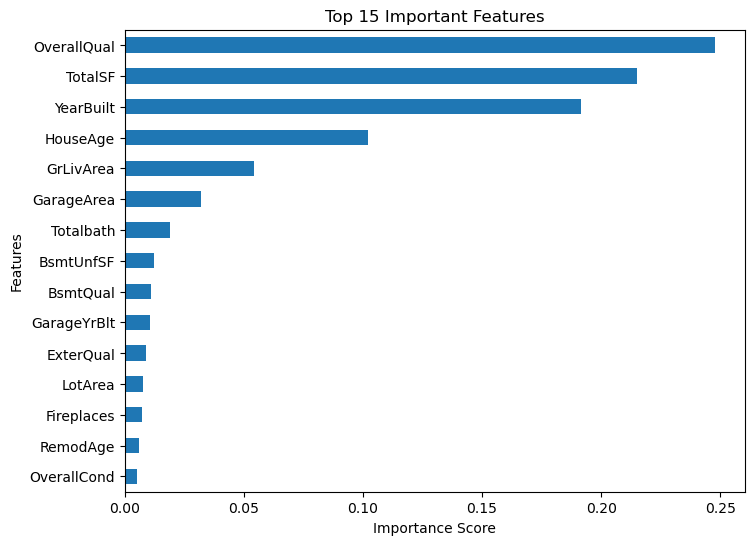

In [62]:
import pandas as pd

importance = pd.Series(
    best_gb.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

top_features = importance.head(15)
plt.figure(figsize=(8,6))
top_features.plot(kind="barh")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 15 Important Features")
plt.gca().invert_yaxis()
plt.show()


Insights & Observations

TotalSF is the most influential feature, indicating that overall usable space is the strongest driver of house price.

OverallQual and GarageYrBlt highlight the importance of construction quality and property age.

Living space (GrLivArea), bathrooms, and garage-related features consistently contribute to price variation.

Lot size and basement features have smaller but still meaningful influence.

Business Implications

Pricing strategies should prioritize property size and overall quality as primary value levers.

Renovations improving quality, living space, or garage facilities are likely to yield higher ROI.

Developers and sellers can focus investments on features with the highest importance to maximize resale value.

In [72]:
cross_val_score(model, X, y, cv=5, scoring="r2")

array([0.8997597 , 0.89794055, 0.84814788, 0.89872683, 0.89031366])

In [63]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_rmse = -cross_val_score(
    best_gb,
    X_train,
    y_train,
    cv=5,
    scoring="neg_root_mean_squared_error"
)

print("Cross-Validated RMSE:", cv_rmse.mean())

Cross-Validated RMSE: 0.09382275092255034


In [64]:
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, best_gb.predict(X_test))))

cv_rmse = -cross_val_score(
    best_gb, X_train, y_train,
    cv=5,
    scoring="neg_root_mean_squared_error"
).mean()

print("CV RMSE:", cv_rmse)

Test RMSE: 0.07918297758635355
CV RMSE: 0.09382275092255034


In [65]:
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

n = X_test.shape[0]
p = X_test.shape[1]

adj_ridge = adjusted_r2(
    r2_score(y_test, y_pred_ridge),
    n,
    p
)

adj_lasso = adjusted_r2(
    r2_score(y_test, y_pred_lasso),
    n,
    p
)


print("Ridge Adjusted R2:", adj_ridge)
print("Lasso Adjusted R2:", adj_lasso)

Ridge Adjusted R2: 0.4183135247661969
Lasso Adjusted R2: 0.2729651832218408


In [66]:
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

n = X_test.shape[0]
p = X_test.shape[1]

adj_lr = adjusted_r2(r2_score(y_test, y_pred), n, p)
adj_ridge = adjusted_r2(r2_score(y_test, y_pred_ridge), n, p)
adj_lasso = adjusted_r2(r2_score(y_test, y_pred_lasso), n, p)

print("Linear Regression Adjusted R2:", adj_lr)
print("Ridge Adjusted R2:", adj_ridge)
print("Lasso Adjusted R2:", adj_lasso)

Linear Regression Adjusted R2: 0.549866017881102
Ridge Adjusted R2: 0.4183135247661969
Lasso Adjusted R2: 0.2729651832218408


In [67]:
print("Rows:", X_test.shape[0])
print("Columns:", X_test.shape[1])

Rows: 107
Columns: 83


In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

#model = LinearRegression()
model = GradientBoostingRegressor()
# 5-Fold CV using R2
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("R2 scores for each fold:", cv_scores)
print("Mean R2:", cv_scores.mean())
print("Std Dev:", cv_scores.std())


R2 scores for each fold: [0.90897667 0.90979848 0.84284903 0.91343533 0.87080949]
Mean R2: 0.8891737991413986
Std Dev: 0.027890447121064442


In [69]:
from sklearn.model_selection import cross_validate

scoring = ['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error']

results = cross_validate(
    model,
    X,
    y,
    cv=5,
    scoring=scoring
)

print("R2:", results['test_r2'].mean())
print("MAE:", -results['test_neg_mean_absolute_error'].mean())
print("RMSE:", -results['test_neg_root_mean_squared_error'].mean())


R2: 0.8869777256987408
MAE: 0.06890357321102568
RMSE: 0.09776632006120893


In [70]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01)

ridge_cv = cross_val_score(ridge, X, y, cv=5, scoring='r2')
lasso_cv = cross_val_score(lasso, X, y, cv=5, scoring='r2')

print("Ridge Mean R2:", ridge_cv.mean())
print("Lasso Mean R2:", lasso_cv.mean())


Ridge Mean R2: 0.8878780240788092
Lasso Mean R2: 0.8825937350213785


In [71]:
from sklearn.model_selection import cross_val_score

cv_rmse = -cross_val_score(model, X, y,
                            scoring="neg_root_mean_squared_error",
                            cv=5)

print("Mean CV RMSE:", cv_rmse.mean())
print("Std:", cv_rmse.std())


Mean CV RMSE: 0.09776632006120893
Std: 0.010173052493847675
